![alttext](logo.png)

### Nombre Alumno: Eduardo López
### Generación :  G10
### Profesores : Bernarda Rodríguez - Yanina 
### Fecha : Lunes 21 de Octubre 2019

# Desafío 1: Lectura de archivos 
* Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Importe la base de datos bfi.csv y asígnela a un objeto df.
* Solicite las primeras 5 observaciones con head.

In [1]:
import pandas as pd
import numpy as np
import factor_analyzer as factor 
import missingno as msgn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from matplotlib import rcParams

df = pd.read_csv("bfi.csv")
plt.style.use("seaborn")

In [2]:
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


# Desafío 2: Preprocesamiento
* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
* Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [3]:
df = df.drop(columns = "Unnamed: 0")

In [4]:
df.head(2)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18


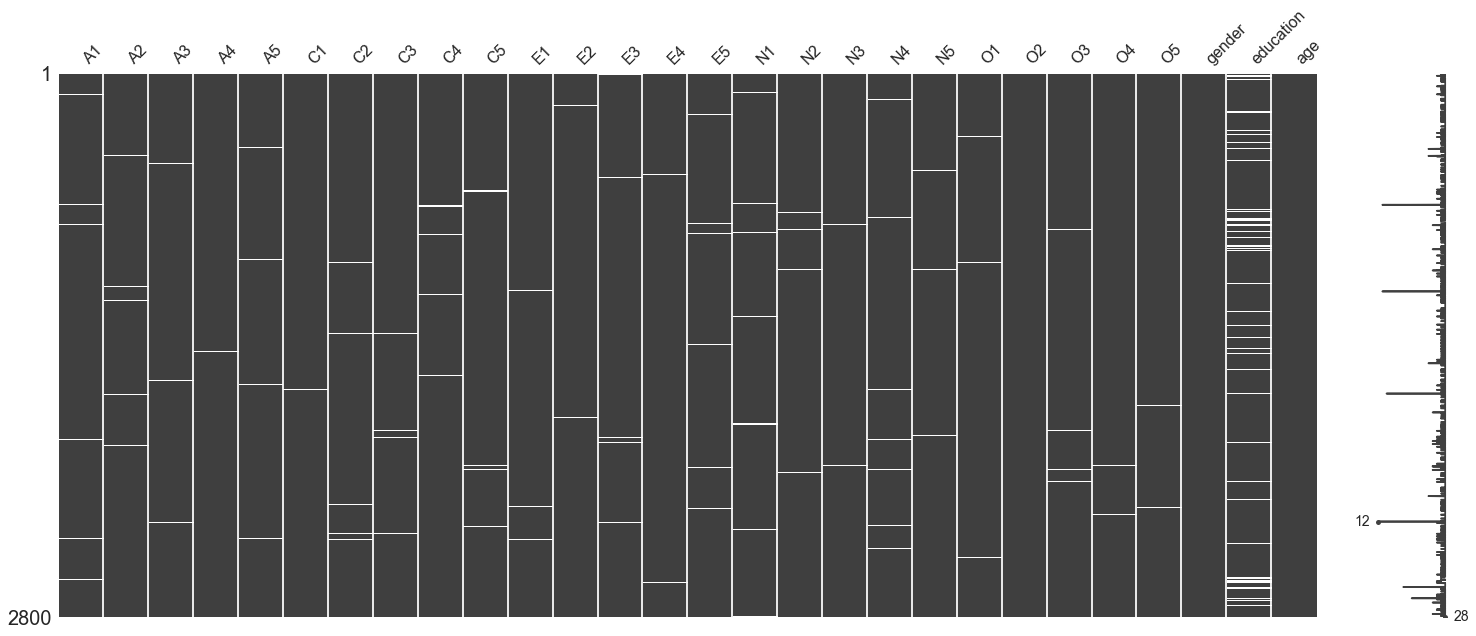

In [5]:
msgn.matrix(df)

#### En general todos los items de preguntas presentan parecida cantidad de valores perdidos. A diferencia de la columna educacion que presenta una alta cantidad de valores perdidos. Dado esto, significa que cuando se realice el analisis factorial, este item presente una baja carga.

### Generando nuevo dataframe sin valores perdidos

In [6]:
trust_df = df
trust_df.dropna(inplace = True)

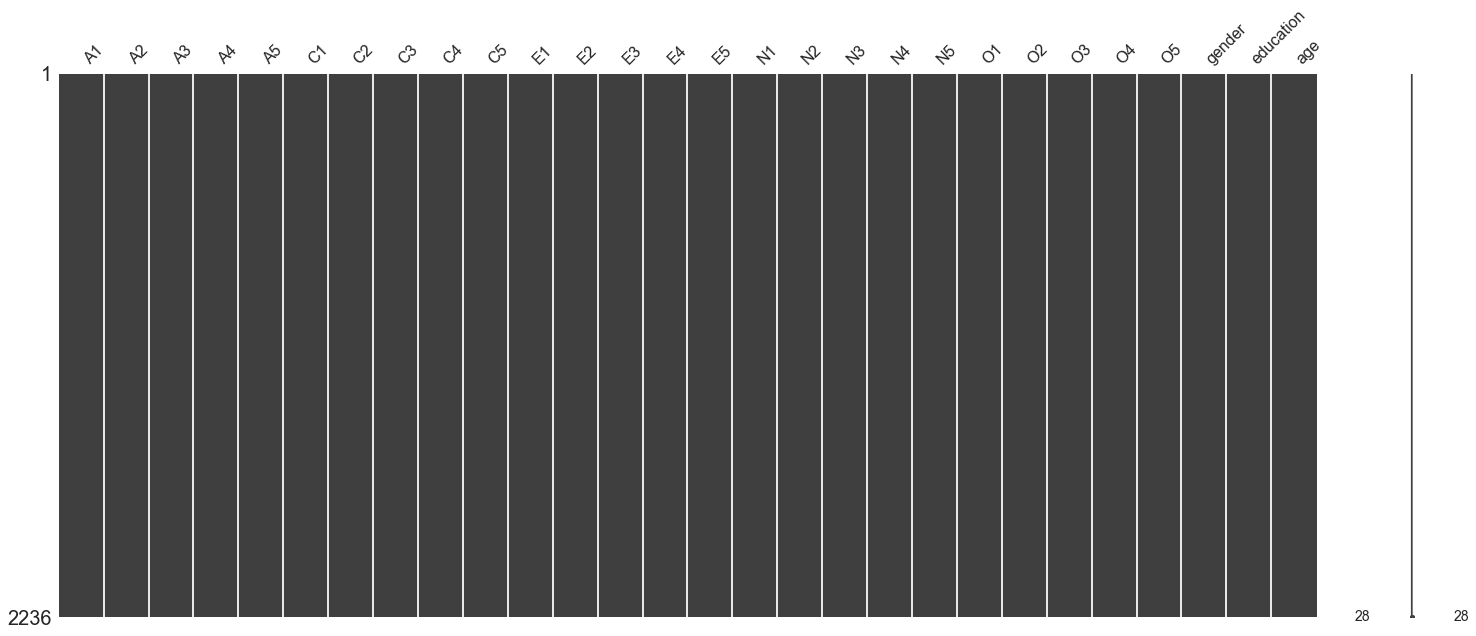

In [7]:
msgn.matrix(trust_df)

# Desafío 3: Descripción
* Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [8]:
def data_batery(dataframe, variable):
    df_letter = dataframe.filter(regex = variable)
    variable, mean = [], []

    for colname, serie in df_letter.iteritems():
        variable.append(colname)
        mean.append(serie.mean())

    tmp_df = pd.DataFrame({"var": variable, "mean": mean}).sort_values(by=["mean"])
    return tmp_df
    #plt.plot(tmp_df["mean"], tmp_df["var"], "o")

In [9]:
A_df = data_batery(trust_df, "A_*")

In [10]:
C_df = data_batery(trust_df, "C_*")

In [11]:
E_df = data_batery(trust_df, "E_*")

In [12]:
N_df = data_batery(trust_df, "N_*")

In [13]:
O_df = data_batery(trust_df, "O_*")

In [14]:
questions_df = pd.concat([A_df, C_df, E_df, N_df, O_df])
questions_df = questions_df.sort_values(by = ["mean"])

Text(0, 0.5, 'Pregunta')

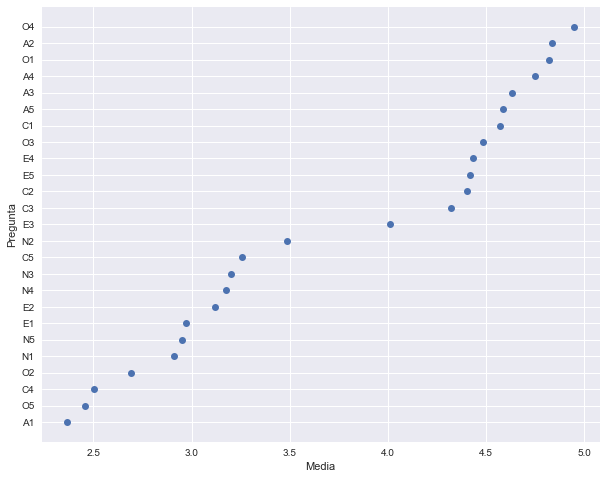

In [15]:
plt.figure(figsize = (10,8))
plt.plot(questions_df["mean"], questions_df["var"], "o")
plt.xlabel("Media")
plt.ylabel("Pregunta")

#### Mayores valores significan un mayor grado de desconfianza, es decir las preguntas O4, A2, O1, A4, A3, etc. Son mayormente susceptibles a generar desconfianza en las personas al momento de contestarlas.

In [16]:
preguntas_df = df.drop(["gender", "education", "age"], axis = 1)

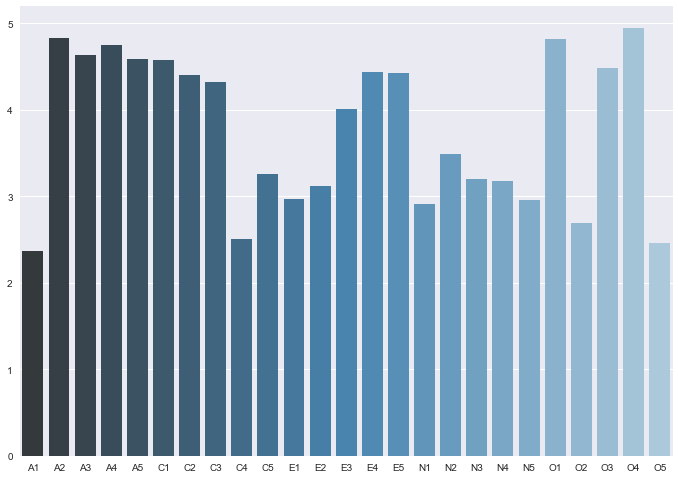

In [17]:
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x = preguntas_df.mean().index, y = preguntas_df.mean(), palette="Blues_d")
plt.show()

#### Se puede visualizar que al comparar ambos graficos, tanto el de barras como el de puntos, los valores apuntan a los mismos resultados sobre niveles de desconfianza en ciertas preguntas.

### Heatmap 

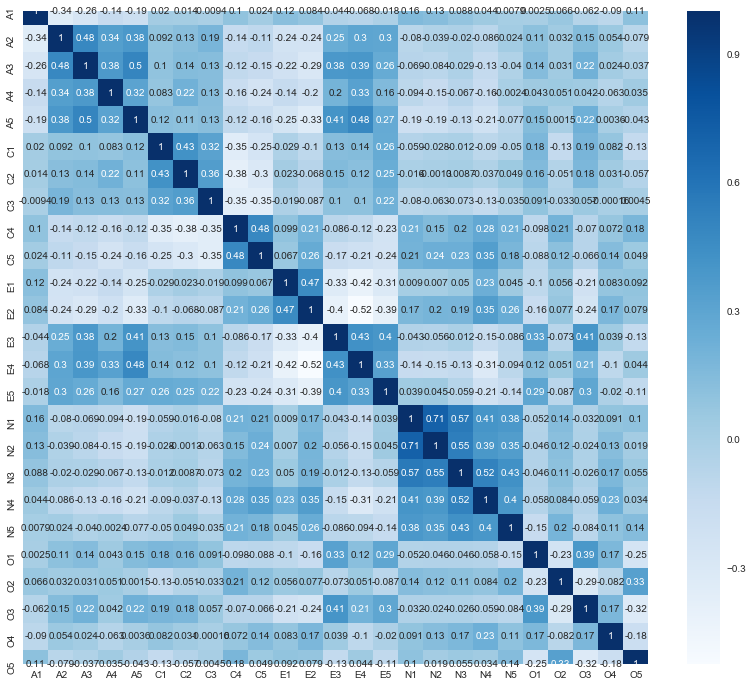

In [18]:
rcParams['figure.figsize'] = 14,12
sns.heatmap(preguntas_df.corr(), cmap='Blues', annot=True)

#### La pregunta N1 y N2 presentan un alto nivel de correlacion, con un 71%.
* N1: Me enojo facilmente
* N2: Me irrito facilmente 

#### Todos los demas items presentan niveles de correlacion bajo el 57%

# Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidasque informó el scree plot.
* Extraiga las cargas  del modelo e identifique qué items están asociados a cada factor.
* Comente sobre qué significa cada factor construído.

In [19]:
factor.calculate_bartlett_sphericity(preguntas_df)

(16484.78165416042, 0.0)

#### $H_0$ -> La matriz de correlaciones es una matriz de identidad. Es decir no existe varianza entre items.
#### Si el segundo elemento de la lista es un valor menor a 0.05 entonces se decide a rechazar la hipotesis nula. Dado que el valor obtenido es 0.0 se falla en rechazar la hipotesis nula.

In [20]:
factor.calculate_kmo(preguntas_df)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781353)

#### Segun el test de KMO, obtenemos un puntaje de 0.84 global, donde el resto de nuestras variables presentan un puntaje mayor a 0.7. Esto quiere decir que existe por lo menos un factor latente. Y por lo tanto se decide conservar todos los atributos.

In [21]:
factorize = factor.FactorAnalyzer()

In [22]:
factorize.analyze(preguntas_df, n_factors = 10, rotation = None)

In [23]:
factor_eigenvalues = factorize.get_eigenvalues()[0]

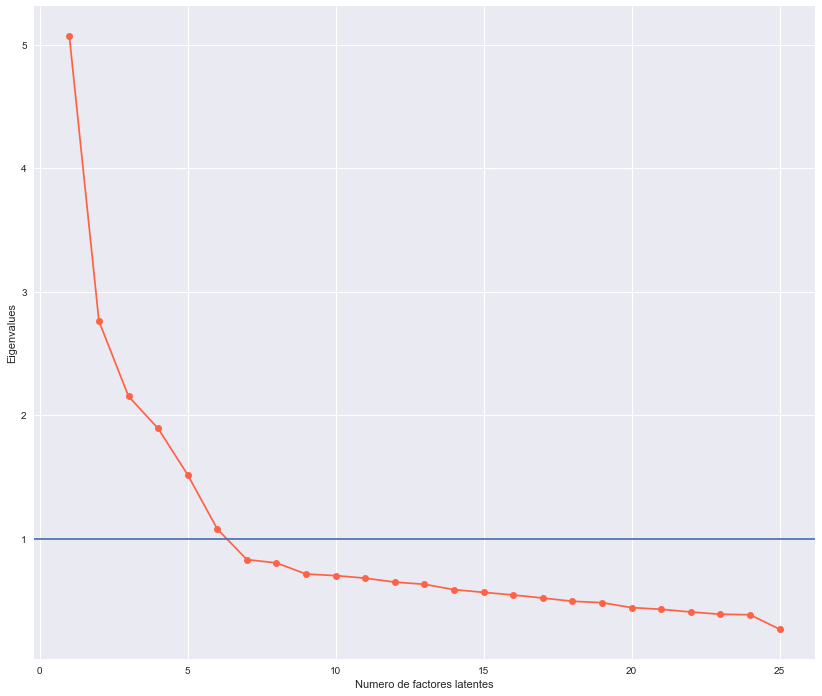

In [24]:
plt.plot(factor_eigenvalues.index + 1,
        factor_eigenvalues.values, "o-", color = "tomato")
plt.xlabel("Numero de factores latentes")
plt.ylabel("Eigenvalues")
plt.axhline(1)

#### Por convencion todo valor sobre el 1 significa que ese valor explica una parte de la varianza igual a la de una variable. Dado esto se decide conversar 6 factores latentes.

### Refactorizacion de factores

In [25]:
factorize_2 = factor.FactorAnalyzer()
factorize_2.analyze(preguntas_df, n_factors = 6, rotation = None)

In [26]:
factorize_2.loadings.applymap(lambda x: np.where(x < .4, " ", round(x, 2)))

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,,,,,,
A2,0.46,,,,,
A3,0.52,,,,,
A4,,,,,,
A5,0.57,,,,,
C1,,,0.44,,,
C2,,,0.45,,,
C3,,,,,,
C4,,,,,,
C5,,,,,,


#### Los factores pueden ser interpretados como la estandarizacion de la regresion de coeficientes. Se puede decir que una variable (en este caso la pregunta), posee un nivel de correlacion con un factor. Esto se consideraría una asociación fuerte para un análisis factorial en la mayoría de los siguientes campos de estudio.

# Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con kdplot.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

$ y = \beta_0 + \beta_1 * gender + \beta_2 * education + \beta_1 * age + \varepsilon_i $

#### Extracción de factores 

In [27]:
fact_load = factorize_2.loadings

#### Gráficos de densidad utilizando kdeplot para cada factor

Text(0.5, 1.0, 'Factor 1')

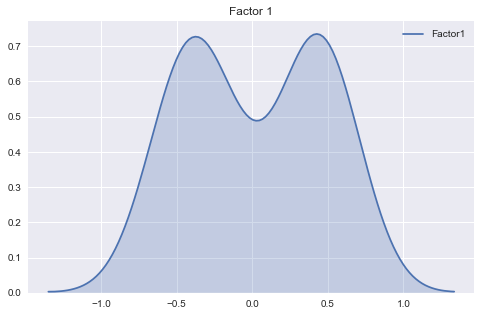

In [28]:
plt.figure(figsize = (8,5))
sns.kdeplot(fact_load.Factor1, shade = True, legend = True)
plt.title("Factor 1")

Text(0.5, 1.0, 'Factor 2')

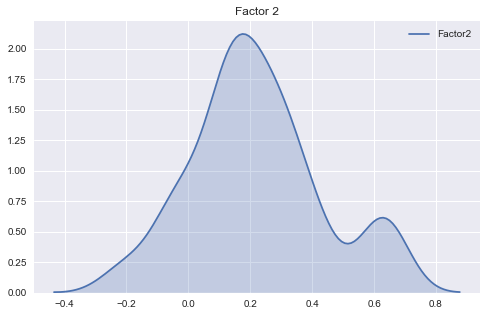

In [29]:
plt.figure(figsize = (8,5))
sns.kdeplot(fact_load.Factor2, shade = True, legend = True)
plt.title("Factor 2")

Text(0.5, 1.0, 'Factor 3')

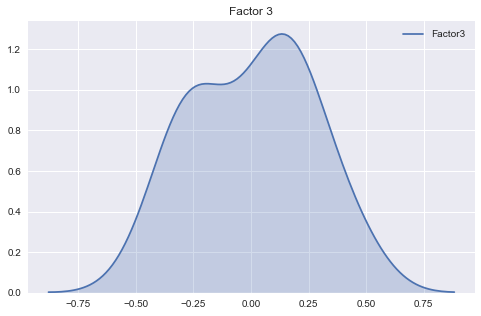

In [30]:
plt.figure(figsize = (8,5))
sns.kdeplot(fact_load.Factor3, shade = True, legend = True)
plt.title("Factor 3")

Text(0.5, 1.0, 'Factor 4')

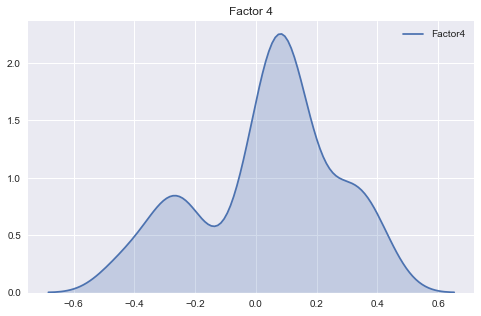

In [31]:
plt.figure(figsize = (8,5))
sns.kdeplot(fact_load.Factor4, shade = True, legend = True)
plt.title("Factor 4")

Text(0.5, 1.0, 'Factor 5')

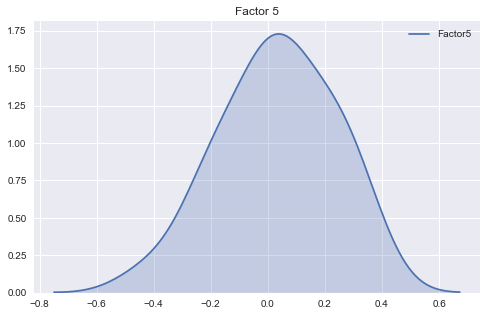

In [32]:
plt.figure(figsize = (8,5))
sns.kdeplot(fact_load.Factor5, shade = True, legend = True)
plt.title("Factor 5")

Text(0.5, 1.0, 'Factor 6')

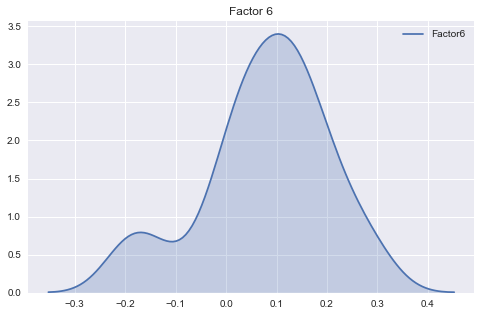

In [33]:
plt.figure(figsize = (8,5))
sns.kdeplot(fact_load.Factor6, shade = True, legend = True)
plt.title("Factor 6")